In [1]:
from sklearn import datasets
import pandas as pd

# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines

#selecting only first 4 columns as they are the independent(X) variable
# any kind of feature selection or correlation analysis should be first done on these
iris_X=iris_df.iloc[:,[0,1,2,3]]

In [2]:
iris_X.head()

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_X.info

<bound method DataFrame.info of      sepal_len  sepal_wid  petal_len  petal_wid
0          5.1        3.5        1.4        0.2
1          4.9        3.0        1.4        0.2
2          4.7        3.2        1.3        0.2
3          4.6        3.1        1.5        0.2
4          5.0        3.6        1.4        0.2
..         ...        ...        ...        ...
145        6.7        3.0        5.2        2.3
146        6.3        2.5        5.0        1.9
147        6.5        3.0        5.2        2.0
148        6.2        3.4        5.4        2.3
149        5.9        3.0        5.1        1.8

[150 rows x 4 columns]>

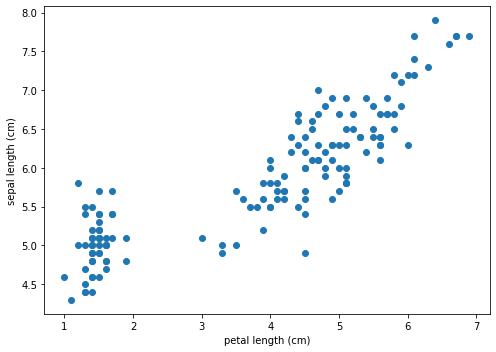

In [4]:
import matplotlib.pyplot as plt 
x_index = 2
y_index = 0
plt.figure(figsize=(7, 5))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index])
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [5]:
iris['data'].shape

(150, 4)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(iris_X)

PCA(n_components=2, whiten=True)

In [7]:
X_pca = pca.transform(iris_X)

In [8]:
X_pca.shape

(150, 2)

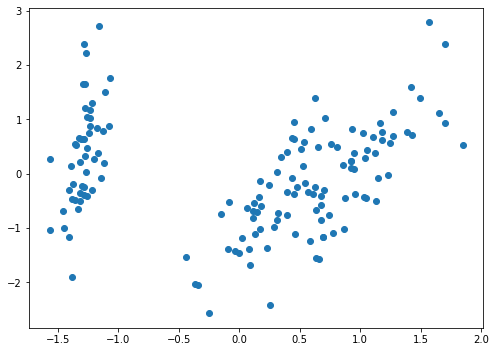

In [9]:
import matplotlib.pyplot as plt 
x_index = 2
y_index = 0
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:,0], X_pca[:,1])

plt.tight_layout()
plt.show()

In [10]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=40).fit_transform(iris_X)
X_embedded.shape

(150, 2)

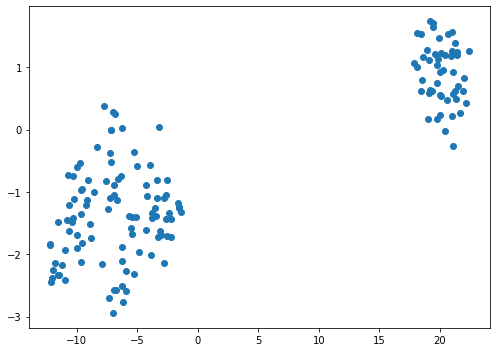

In [11]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(7, 5))
plt.scatter(X_embedded[:,0], X_embedded[:,1])

plt.tight_layout()
plt.show()

In [12]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=3, min_samples=2).fit(iris_X)
clustering.labels_
clustering
DBSCAN(eps=3, min_samples=2)

DBSCAN(eps=3, min_samples=2)

In [13]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(iris_X)
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

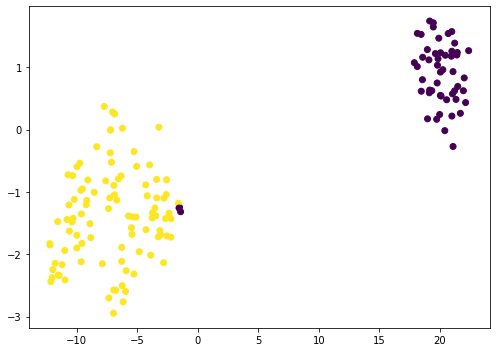

In [14]:
plt.figure(figsize=(7, 5))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=kmeans.labels_)

plt.tight_layout()
plt.show()

In [15]:
kmeans.inertia_

152.34795176035792

In [16]:
inertias = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(iris_X)
    inertias.append(kmeans.inertia_) 

In [17]:
inertias

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.472230158730156,
 39.03998724608725,
 34.299712121212124,
 30.063110617452725,
 28.271721728563836]

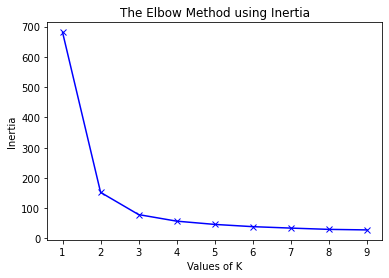

In [18]:
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


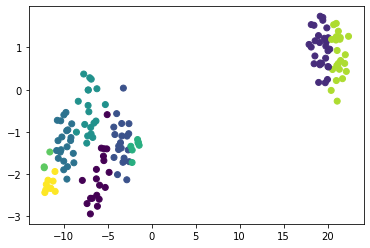

In [19]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=kmeans.labels_)

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(iris_X)
y = kmeans.labels_

In [21]:
iris_X['clusters']=y
iris_X

,sepal_len,sepal_wid,petal_len,petal_wid,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
iris_X[iris_X['clusters']==0].describe()

,sepal_len,sepal_wid,petal_len,petal_wid,clusters
count,62.000000,62.000000,62.000000,62.000000,62.0
mean,5.901613,2.748387,4.393548,1.433871,0.0
std,0.466410,0.296284,0.508895,0.297500,0.0
min,4.900000,2.000000,3.000000,1.000000,0.0
25%,5.600000,2.500000,4.025000,1.300000,0.0
50%,5.900000,2.800000,4.500000,1.400000,0.0
75%,6.200000,3.000000,4.800000,1.575000,0.0
max,7.000000,3.400000,5.100000,2.400000,0.0


In [23]:
iris_X[iris_X['clusters']==1].describe()

,sepal_len,sepal_wid,petal_len,petal_wid,clusters
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,1.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,1.0
25%,4.80000,3.200000,1.400000,0.200000,1.0
50%,5.00000,3.400000,1.500000,0.200000,1.0
75%,5.20000,3.675000,1.575000,0.300000,1.0
max,5.80000,4.400000,1.900000,0.600000,1.0


In [24]:
iris_X[iris_X['clusters']==2].describe()

,sepal_len,sepal_wid,petal_len,petal_wid,clusters
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,6.850000,3.073684,5.742105,2.071053,2.0
std,0.494155,0.290092,0.488590,0.279872,0.0
min,6.100000,2.500000,4.900000,1.400000,2.0
25%,6.425000,2.925000,5.425000,1.825000,2.0
50%,6.700000,3.000000,5.650000,2.100000,2.0
75%,7.200000,3.200000,6.000000,2.300000,2.0
max,7.900000,3.800000,6.900000,2.500000,2.0


In [26]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4, random_state=0).fit(iris_X)

In [27]:
gmm.predict(iris_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

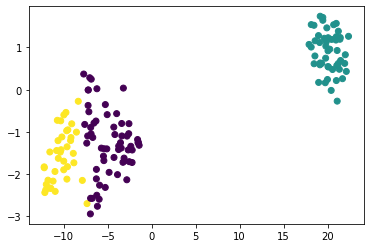

In [29]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=kmeans.labels_)